In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

## Generate a target signal

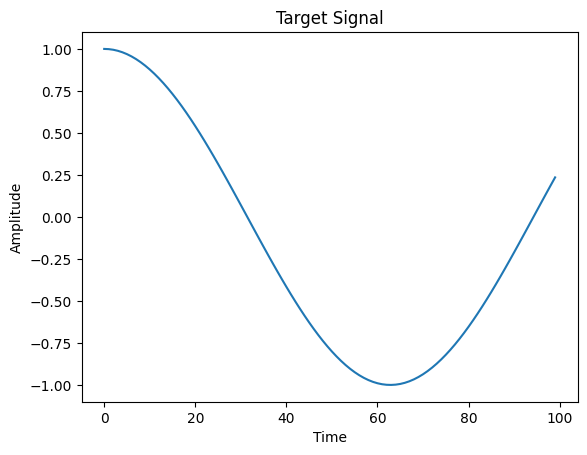

In [2]:
x = np.arange(100)
target_signal = np.cos(x/20)

plt.plot(x,target_signal)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Target Signal")
plt.show()

## Generate some Gaussian Noise. Add your target signal to the noise.

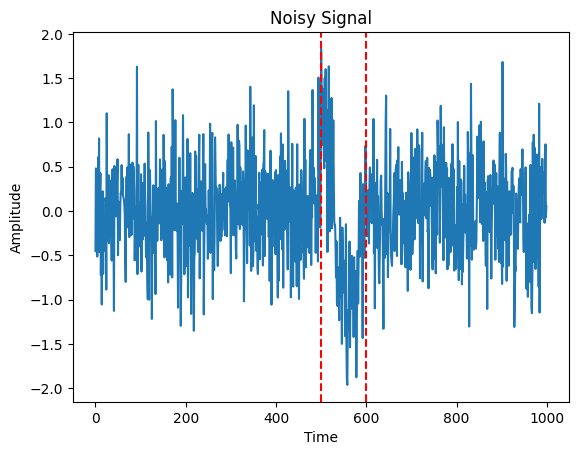

In [3]:
x = np.arange(1e3)
noise = np.random.normal(size=x.size)/2

add_location = len(noise)//2
noise[add_location:add_location+len(target_signal)] += target_signal

plt.plot(x,noise)
plt.axvline(add_location, color="red", linestyle="--")
plt.axvline(add_location+len(target_signal),color="red", linestyle="--")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Noisy Signal")
plt.show()

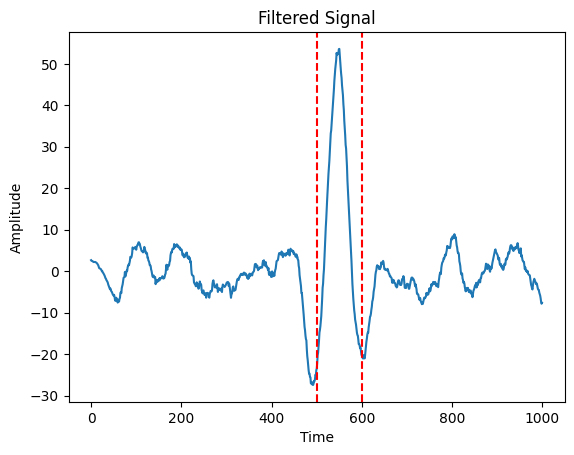

In [4]:
match_filtered = correlate(noise, target_signal, mode="same")
x = np.arange(match_filtered.size)

plt.plot(x,match_filtered)
plt.axvline(add_location, color="red", linestyle="--")
plt.axvline(add_location+len(target_signal),color="red", linestyle="--")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Filtered Signal")
plt.show()

## Plot all three plots together

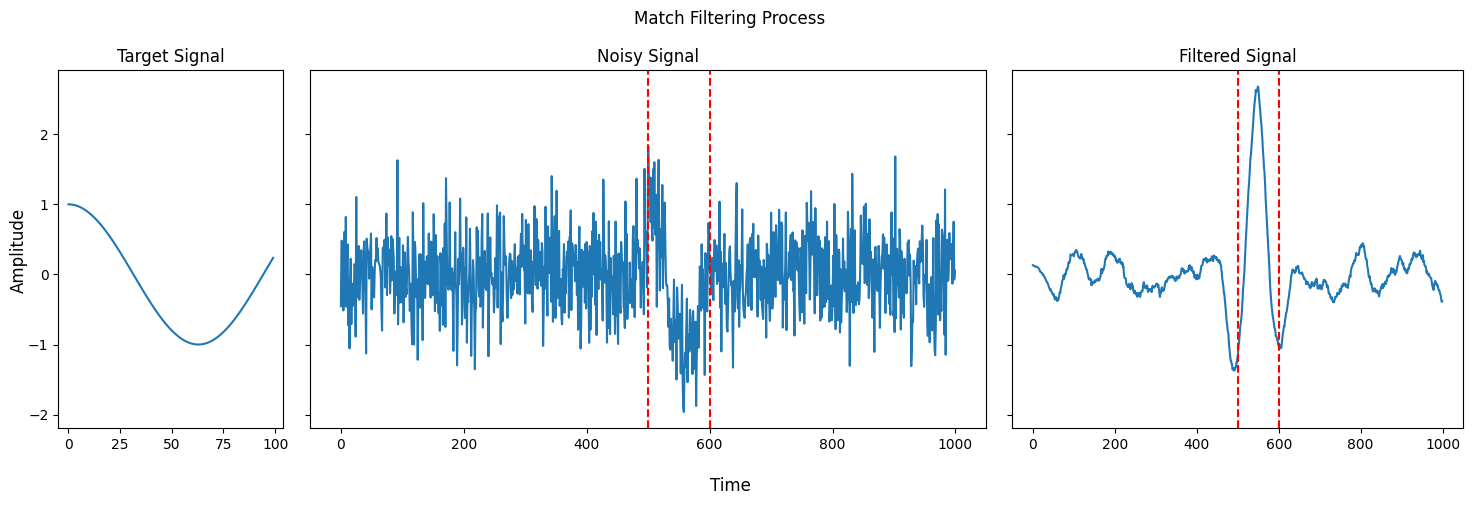

In [44]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(15,5), width_ratios=[1,3,2])

ax[0].plot(np.arange(target_signal.size),target_signal)
ax[0].set_title("Target Signal")

ax[1].plot(np.arange(noise.size),noise)
ax[1].axvline(add_location, color="red", linestyle="--")
ax[1].axvline(add_location+len(target_signal),color="red", linestyle="--")
ax[1].set_title("Noisy Signal")

ax[2].plot(np.arange(match_filtered.size),match_filtered/20) #scaled for plotting purposes
ax[2].axvline(add_location, color="red", linestyle="--")
ax[2].axvline(add_location+len(target_signal),color="red", linestyle="--")
ax[2].set_title("Filtered Signal")

fig.supxlabel('Time')
fig.supylabel('Amplitude')
fig.suptitle("Match Filtering Process")

plt.tight_layout()
plt.savefig("match-filtering.png", dpi=300)
plt.show()